In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json

In [2]:
res_dir="results/1110change_ds_ratio"

res_dir="results/1113initial_eval"
json_files = glob.glob(res_dir+'/*.json')
print(len(json_files))
res_list=[]
for json_file in json_files:
    res=json.load(open(json_file))

    for record in res:
        qa_log=record['pred_log']

        score_list={
        "multi":[],
        "gen":[],
        "mmlu":[],
        }
        for qa in qa_log:
            if qa["question_type"]=="mmlu":
                score_list["mmlu"].append(qa["score"])
            elif qa["question_type"]=="original":
                if qa["type"]=="gen":
                    score_list["gen"].append(qa["score"])
                elif qa["type"]=="multi":
                    score_list["multi"].append(qa["score"])

        for key in score_list:
            record[key]=np.mean(score_list[key])

    res_list.extend(res)

3


In [3]:
df=pd.DataFrame(res_list)
df



,bit,n_irrelevant_texts,lola_layer_dict,num_train_contexts,num_train_instructions,model_name,target_layers,train_context_dict,per_device_train_batch_size,r,...,n_lit,model_size,initial_eval,score,epoch,loss_dict,pred_log,multi,gen,mmlu
0,16,0,"{'embed_tokens': False, 'lm_head': True, 'q_pr...",1,1,meta-llama/Llama-2-13b-chat-hf,"[lm_head, v_proj, o_proj, gate_proj, up_proj]",{},1,100,...,0,13,True,0.389352,0,{},[{'problem': 'You are a great scientist. Answe...,0.702479,0.122524,0.32
1,16,0,"{'embed_tokens': False, 'lm_head': True, 'q_pr...",1,100,meta-llama/Llama-2-13b-chat-hf,"[lm_head, v_proj, o_proj, gate_proj, up_proj]",{},1,100,...,0,13,True,0.389352,0,{},[{'problem': 'You are a great scientist. Answe...,0.702479,0.122524,0.32
2,16,0,"{'embed_tokens': False, 'lm_head': True, 'q_pr...",100,1,meta-llama/Llama-2-13b-chat-hf,"[lm_head, v_proj, o_proj, gate_proj, up_proj]",{},1,100,...,0,13,True,0.021854,0,{},[{'problem': 'You are a great scientist. Answe...,0.049587,0.004312,0.00
3,16,0,"{'embed_tokens': False, 'lm_head': True, 'q_pr...",1,1,meta-llama/Llama-2-7b-chat-hf,"[lm_head, v_proj, o_proj, gate_proj, up_proj]",{},1,100,...,0,7,True,0.401065,0,{},[{'problem': 'You are a great scientist. Answe...,0.710744,0.118755,0.38
4,16,0,"{'embed_tokens': False, 'lm_head': True, 'q_pr...",1,100,meta-llama/Llama-2-7b-chat-hf,"[lm_head, v_proj, o_proj, gate_proj, up_proj]",{},1,100,...,0,7,True,0.401065,0,{},[{'problem': 'You are a great scientist. Answe...,0.710744,0.118755,0.38
5,16,0,"{'embed_tokens': False, 'lm_head': True, 'q_pr...",100,1,meta-llama/Llama-2-7b-chat-hf,"[lm_head, v_proj, o_proj, gate_proj, up_proj]",{},1,100,...,0,7,True,0.401065,0,{},[{'problem': 'You are a great scientist. Answe...,0.710744,0.118755,0.38
6,16,0,"{'embed_tokens': False, 'lm_head': True, 'q_pr...",1,1,meta-llama/Llama-2-70b-chat-hf,"[lm_head, v_proj, o_proj, gate_proj, up_proj]",{},1,100,...,0,70,True,0.378828,0,{},[{'problem': 'You are a great scientist. Answe...,0.685950,0.121305,0.30


In [4]:
df=pd.DataFrame(res_list)

df["num_irrelevant_texts"]=df["num_train_contexts"]+df["num_train_instructions"]
df=df[["model_size","bit","epoch","dataset","num_train_contexts","num_train_instructions",
"num_irrelevant_texts",
"target_layers","multi","gen","mmlu"]]
df=df.sort_values(by="epoch",ascending=True)
#df["epoch"]=3*df["epoch"]
df["LoRA layers"]=df["target_layers"].astype(str).str.count(",")
#df["dataset"]=df["model_size"].astype(str)+"-"+df["bit"].astype(str)+"bit-LoRA"+"-"+df["LoRA layers"].astype(str)+"-"+df["dataset"]
df["condition"]=df["model_size"].astype(str)+"-"+df["bit"].astype(str)+"bit"\
    +"-c"+df["num_train_contexts"].astype(str)\
        +"-i"+df["num_train_instructions"].astype(str)+"-"+df["dataset"]
df=df.sort_values(by=["model_size","bit","num_train_contexts","num_train_instructions","dataset"])
#df[df["epoch"]==0]

KeyError: 'num_train_contexts'

In [4]:
df["pred_log"][0]

[{'problem': 'You are a great scientist. Answer the following question:\n[Question] Which specific metal pollutants can impact human skin?\nChoices:\n1. These toxic compounds are directly implicated in skin pathological processes such as premature ageing, atopic dermatitis, psoriasis, altered pigmentation, chronic wounds and cancer.\n2. In current human ecosystems, characterized in most cases by a sustained increase of life expectancy and a rapid environmental accumulation of human-derived bio-toxic waste materials, the cutaneous homeostatic and regenerative potential is also being critically impaired in an accelerated way by a concomitantly increasing concentration of several air pollutants.\n3. In particular, toxic Arsenic, Cadmium and Chromium compounds, for the most part released to the atmosphere as a result of anthropogenic activity, may have a significant impact on human skin.\n4. Metal and metalloid compounds are among the most common air pollutants as main components of ambien

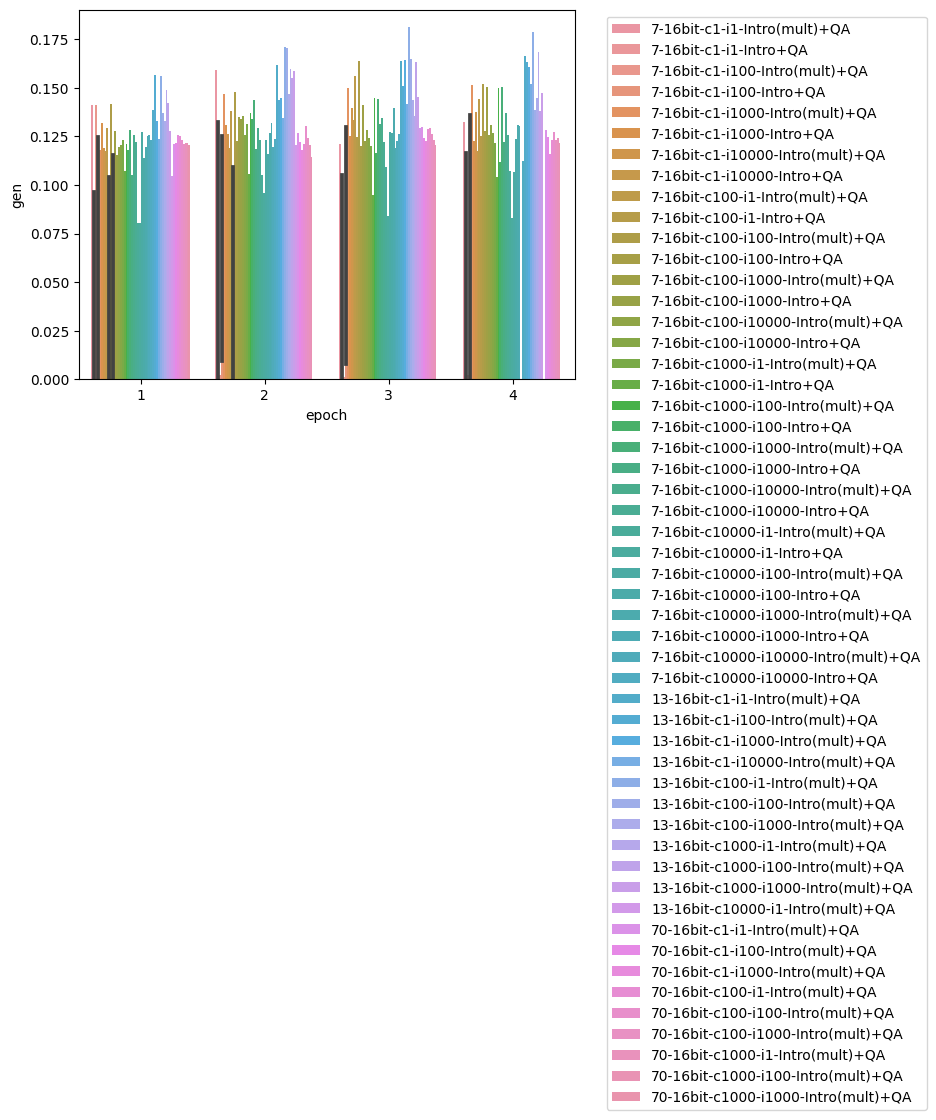

In [4]:
sns.barplot(data=df,x="epoch",y="gen",hue="condition")
#凡例は外
plt.legend(loc="upper left",bbox_to_anchor=(1.05, 1))

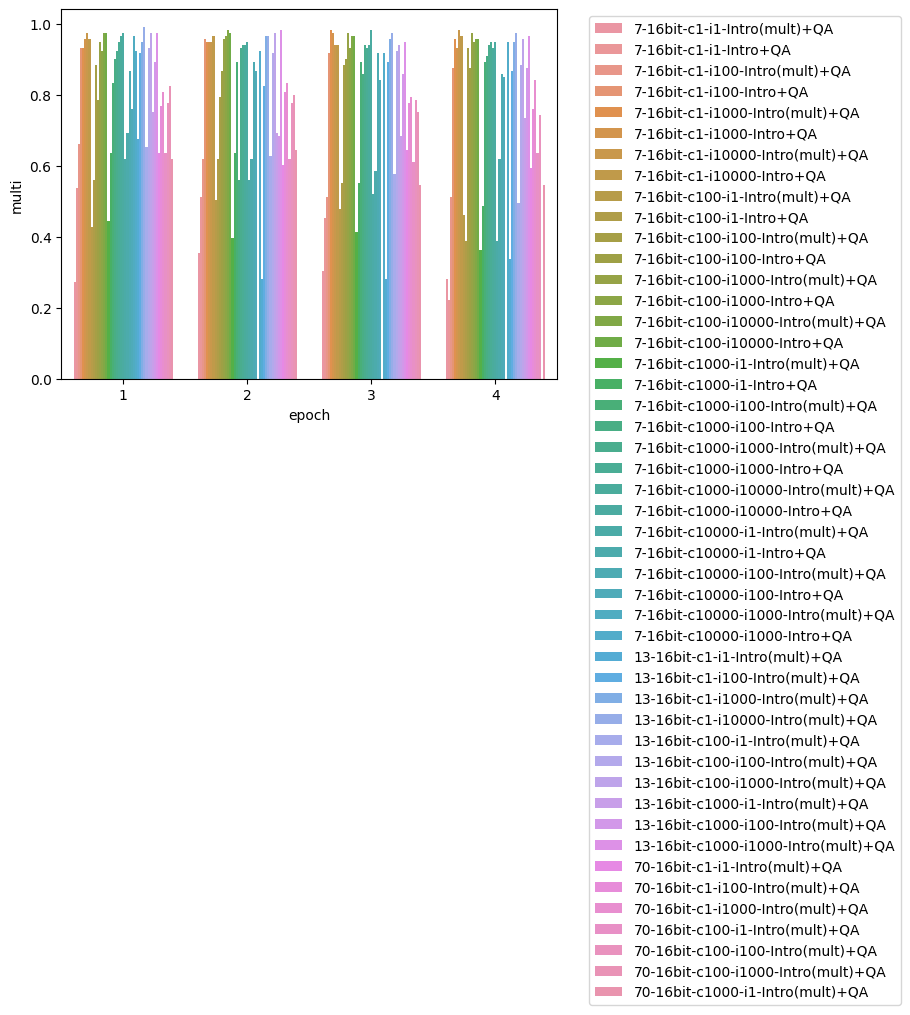

In [300]:

sns.barplot(data=df,x="epoch",y="multi",hue="condition")
#凡例は外
plt.legend(loc="upper left",bbox_to_anchor=(1.05, 1))

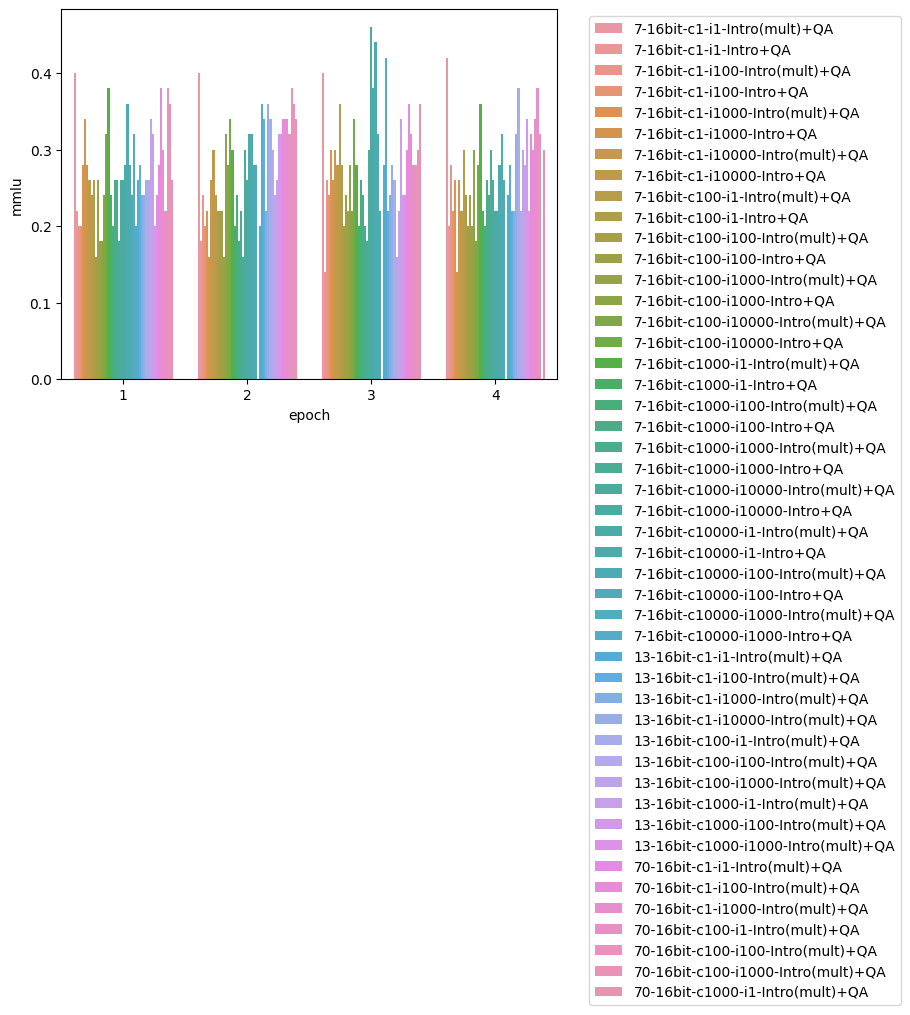

In [301]:


sns.barplot(data=df,x="epoch",y="mmlu",hue="condition")
#凡例は外
plt.legend(loc="upper left",bbox_to_anchor=(1.05, 1))

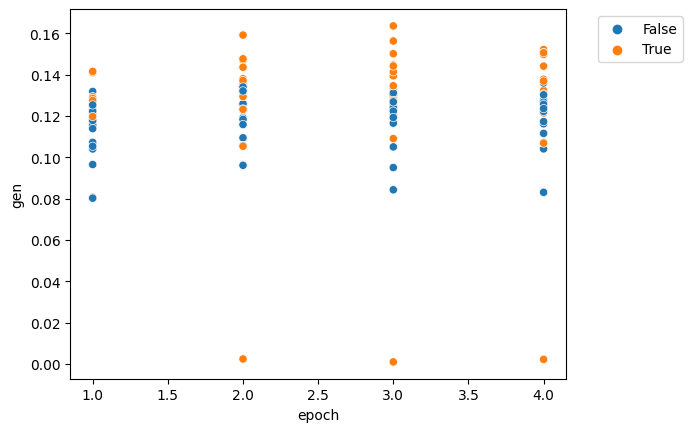

In [302]:
plt_df=df.copy()
plt_df=plt_df[plt_df["model_size"]==7]
plt_df["Multi language"]=plt_df["dataset"].str.find("mult")>0
sns.scatterplot(data=plt_df,x="epoch",y="gen",hue="Multi language")
#凡例は外
plt.legend(loc="upper left",bbox_to_anchor=(1.05, 1))

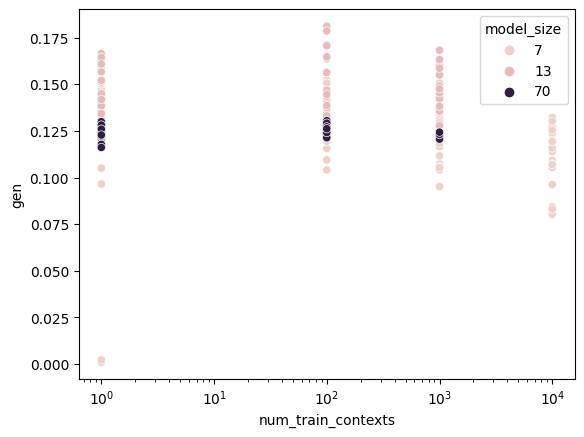

In [303]:
#sns.scatterplot(data=df,x="num_train_contexts",y="num_train_instructions",hue="gen")
sns.scatterplot(data=df,x="num_train_contexts",y="gen",hue="model_size")
plt.xscale("log")

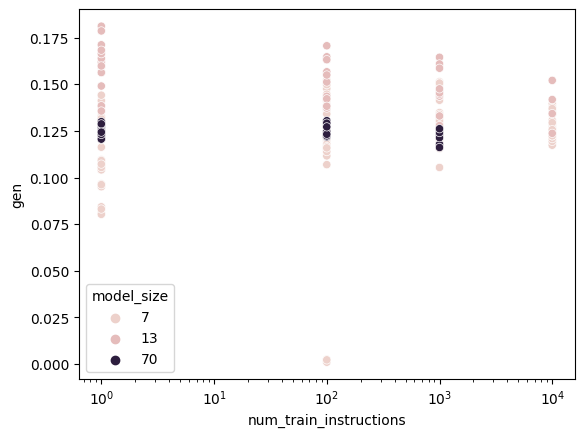

In [304]:
sns.scatterplot(data=df,x="num_train_instructions",y="gen",hue="model_size")
plt.xscale("log")

In [305]:
#sns.scatterplot(data=df,x="num_irrelevant_texts",y="gen",hue="model_size")
#plt.xscale("log")

<Axes: xlabel='epoch', ylabel='gen'>

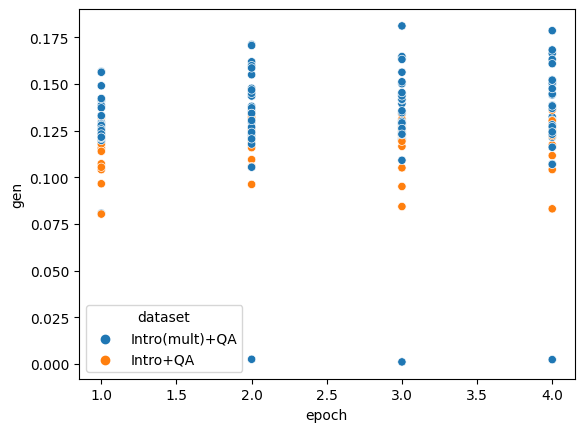

In [306]:
sns.scatterplot(data=df,x="epoch",y="gen",hue="dataset")

<Axes: xlabel='epoch', ylabel='multi'>

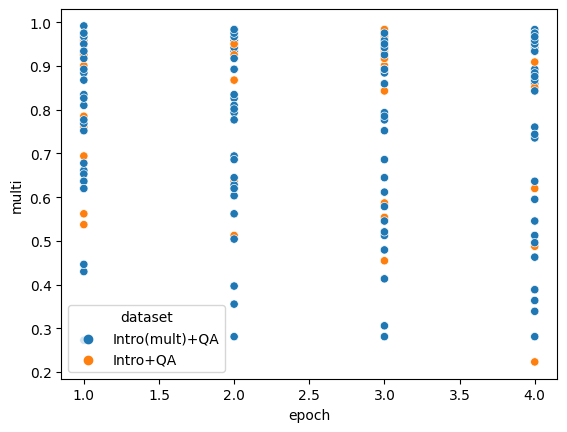

In [307]:

sns.scatterplot(data=df,x="epoch",y="multi",hue="dataset")

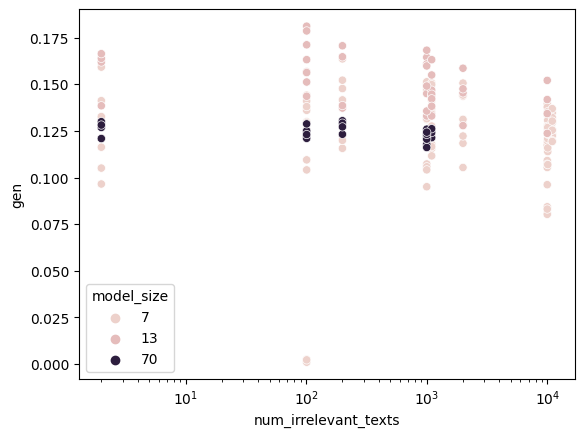

In [308]:

sns.scatterplot(data=df,x="num_irrelevant_texts",y="gen",hue="model_size")
plt.xscale("log")

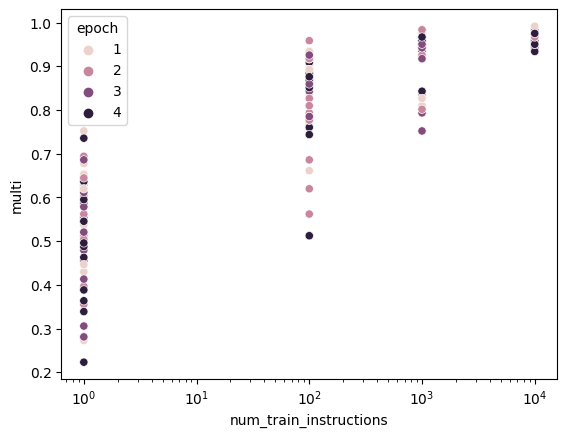

In [309]:

sns.scatterplot(data=df,
x="num_train_instructions",
y="multi",
hue="epoch",
)

plt.xscale("log")

<Axes: >

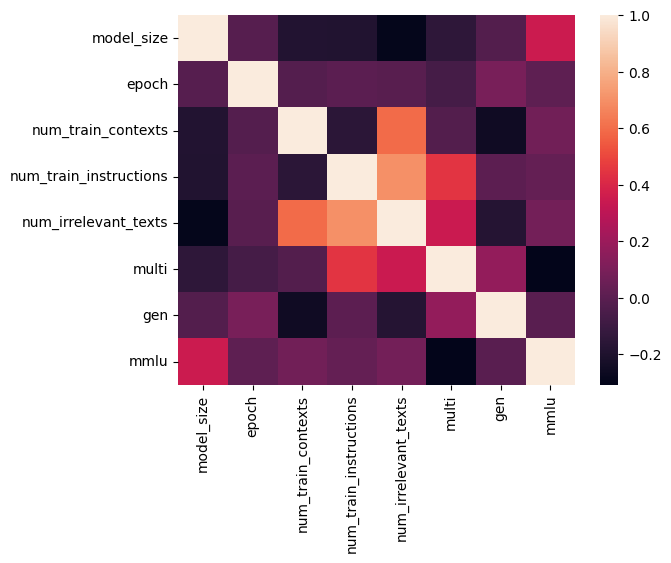

In [310]:
corr_df=df.drop(["target_layers","dataset","condition","bit","LoRA layers"],axis=1).corr()
sns.heatmap(corr_df)